# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('diabetes.csv')

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
y = df['Outcome']
X = df
X.pop('Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
X.shape

(768, 8)

In [29]:
y.shape

(768,)

# Feature Importance Without Scaling

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Using Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()

In [34]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Glucose,0.325971
BMI,0.212627
DiabetesPedigreeFunction,0.119631
Age,0.103371
BloodPressure,0.103033
Pregnancies,0.071817
Insulin,0.039407
SkinThickness,0.024144


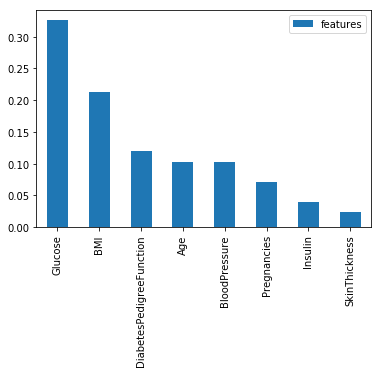

In [48]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

## Using Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf = RandomForestClassifier()

In [60]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Glucose,0.250055
BMI,0.168264
DiabetesPedigreeFunction,0.145509
Age,0.130719
Pregnancies,0.084981
BloodPressure,0.083190
SkinThickness,0.075514
Insulin,0.061768


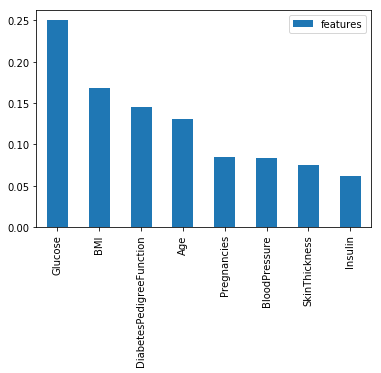

In [62]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

## Using Adaboost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
clf = AdaBoostClassifier()

In [65]:
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [66]:
result = pd.DataFrame(clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
DiabetesPedigreeFunction,0.32
Glucose,0.22
Age,0.12
BMI,0.10
BloodPressure,0.08
Insulin,0.08
Pregnancies,0.04
SkinThickness,0.04


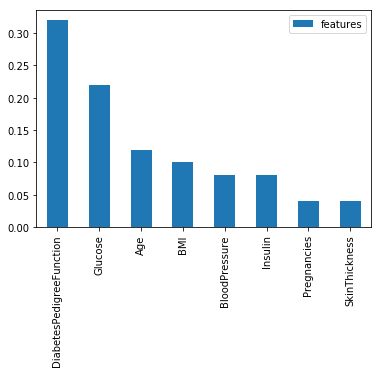

In [67]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

# With Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
X_sc = StandardScaler()

In [74]:
X_std = X_sc.fit_transform(X.values)

In [77]:
X_std = pd.DataFrame(data=X_std, columns=df.columns)
X_std.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [78]:
X_std.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


## Using Decision Tree

In [79]:
clf = DecisionTreeClassifier()

In [81]:
clf.fit(X_std, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
result = pd.DataFrame(clf.feature_importances_, df.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Glucose,0.338659
BMI,0.213943
DiabetesPedigreeFunction,0.141386
Age,0.113837
BloodPressure,0.098162
Insulin,0.042486
Pregnancies,0.040955
SkinThickness,0.010571


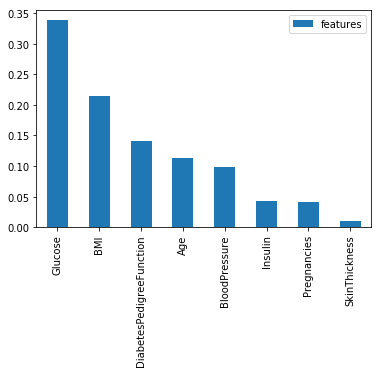

In [84]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

## Using random Forest

In [85]:
clf = RandomForestClassifier()

In [86]:
clf.fit(X_std, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
result = pd.DataFrame(clf.feature_importances_, df.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Glucose,0.296317
BMI,0.167566
DiabetesPedigreeFunction,0.118039
Age,0.112335
BloodPressure,0.082623
Pregnancies,0.080209
SkinThickness,0.073332
Insulin,0.069578


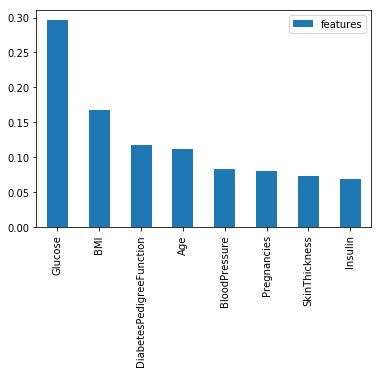

In [89]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

## Using Adaboost

In [90]:
clf = AdaBoostClassifier()

In [91]:
clf.fit(X_std, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [92]:
result = pd.DataFrame(clf.feature_importances_, df.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
DiabetesPedigreeFunction,0.32
Glucose,0.22
Age,0.12
BMI,0.10
BloodPressure,0.08
Insulin,0.08
Pregnancies,0.04
SkinThickness,0.04


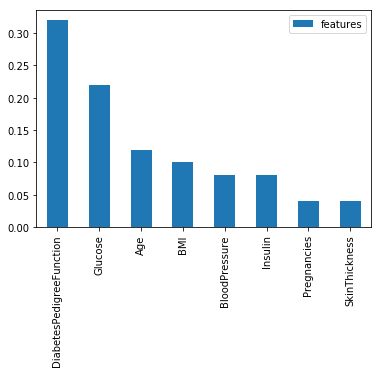

In [94]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

# First 4 important Features In every Algo

In [98]:
algo = np.array(['Decision Tree', 'Random Forest', 'Adaboost'])

In [100]:
imp_feature = np.array([['Glucose, BMI, DPF, Age', 'Glucose, BMI, DPF, Age', 'DPF, Glucose, Age, BMI'],
                        ['Glucose, BMI, DPF, Age', 'Glucose, BMI, DPF, Age', 'DPF, Glucose, Age, BMI']])

In [103]:
important = pd.DataFrame(imp_feature, ['Without Scaling', 'With Scaling'])
important.columns = algo
important.head()

,Decision Tree,Random Forest,Adaboost
Without Scaling,"Glucose, BMI, DPF, Age","Glucose, BMI, DPF, Age","DPF, Glucose, Age, BMI"
With Scaling,"Glucose, BMI, DPF, Age","Glucose, BMI, DPF, Age","DPF, Glucose, Age, BMI"
